In [8]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [9]:
def removeQMark(A, sp):
    flag = 0;
    for i in range (sp,len(A)):
        for j in range (len(A[i])):
            if(A[i][j] == '?'):
                A = np.delete(A,i,0)
                flag = 1;
                break
        if(flag == 1):
            break
    if(flag ==1):
        return removeQMark(A,i)
    else:
        return A

In [10]:
# breast cancer
df_breast_cancer = pd.read_csv("breast-cancer.data", header=None, delimiter=r",",)
data_breast_cancer = df_breast_cancer.values
data_breast_cancer = removeQMark(data_breast_cancer,0)

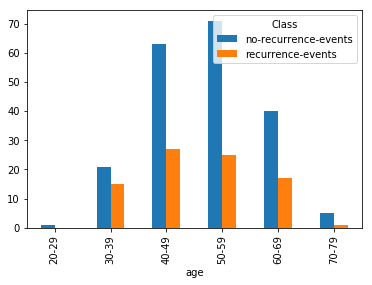

In [24]:
df_breast_cancer.columns = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
pd.crosstab(df_breast_cancer['age'],df_breast_cancer['Class']).plot.bar()
plt.savefig('ageVSclass.pdf',bbox_inches = "tight")

In [12]:
dict = {
    'no-recurrence-events': 0,
    'recurrence-events': 1,
}
for i in range (len(data_breast_cancer[:,0])):
    data_breast_cancer[i,0] = data_breast_cancer[i, 0].strip()
    data_breast_cancer[i,0] = dict[data_breast_cancer[i, 0]]

In [13]:
dict = {
    '10-19': 0,
    '20-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50-59': 4,
    '60-69': 5,
    '70-79': 6,
    '80-89': 7,
    '90-99': 8,
}
for i in range (len(data_breast_cancer[:,1])):
    data_breast_cancer[i,1] = data_breast_cancer[i, 1].strip()
    data_breast_cancer[i,1] = dict[data_breast_cancer[i, 1]]

In [14]:
dict = {
    'lt40': 0,
    'ge40': 1,
    'premeno': 2,
}
for i in range (len(data_breast_cancer[:,2])):
    data_breast_cancer[i,2] = data_breast_cancer[i, 2].strip()
    data_breast_cancer[i,2] = dict[data_breast_cancer[i, 2]]

In [15]:
dict = {
    '0-4': 0,
    '5-9': 1,
    '10-14': 2,
    '15-19': 3,
    '20-24': 4,
    '25-29': 5,
    '30-34': 6,
    '35-39': 7,
    '40-44': 8,
    '45-49': 9,
    '50-54': 10,
    '55-59': 11,
}
for i in range (len(data_breast_cancer[:,3])):
    data_breast_cancer[i,3] = data_breast_cancer[i, 3].strip()
    data_breast_cancer[i,3] = dict[data_breast_cancer[i, 3]]

In [16]:
dict = {
    '0-2': 0,
    '3-5': 1,
    '6-8': 2,
    '9-11':3,
    '12-14':4,
    '15-17':5,
    '18-20':6,
    '21-23':7,
    '24-26':8, 
    '27-29':9,
    '30-32':10,
    '33-35':11,
    '36-39':12,
}
for i in range (len(data_breast_cancer[:,4])):
    data_breast_cancer[i,4] = data_breast_cancer[i, 4].strip()
    data_breast_cancer[i,4] = dict[data_breast_cancer[i, 4]]

In [17]:
dict = {
    'yes': 0,
    'no': 1,
}
for i in range (len(data_breast_cancer[:,5])):
    data_breast_cancer[i,5] = data_breast_cancer[i, 5].strip()
    data_breast_cancer[i,5] = dict[data_breast_cancer[i, 5]]

In [18]:
dict = {
    1: 0,
    2: 1,
    3: 2,
}
for i in range (len(data_breast_cancer[:,6])):
    #data_breast_cancer[i,6] = data_breast_cancer[i, 6].strip()
    data_breast_cancer[i,6] = dict[data_breast_cancer[i, 6]]

In [19]:
dict = {
    'left': 0,
    'right': 1,
}
for i in range (len(data_breast_cancer[:,7])):
    data_breast_cancer[i,7] = data_breast_cancer[i, 7].strip()
    data_breast_cancer[i,7] = dict[data_breast_cancer[i, 7]]

In [20]:
dict = {
    'left_up': 0,
    'left_low': 1,
    'right_up': 2,
    'right_low' : 3,
    'central' : 4,
}
for i in range (len(data_breast_cancer[:,8])):
    data_breast_cancer[i,8] = data_breast_cancer[i, 8].strip()
    data_breast_cancer[i,8] = dict[data_breast_cancer[i, 8]]


In [21]:
dict = {
    'yes': 0,
    'no': 1,
}
for i in range (len(data_breast_cancer[:,9])):
    data_breast_cancer[i,9] = data_breast_cancer[i, 9].strip()
    data_breast_cancer[i,9] = dict[data_breast_cancer[i, 9]]

In [22]:
with open('breast_cancer_processed.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range (len(data_breast_cancer)):
        writer.writerow(data_breast_cancer[i])

In [27]:
tohe = np.array([[]])
ohe = np.array([])
discrete = [1,2,3,4,6,8]
discrete_length = [9,3,12,13,3,5]
def one_hot(rowNum,colNum):
    for z in range (discrete_length[colNum]):
        if(data_breast_cancer[rowNum][discrete[colNum]] == z):
            zer = np.zeros(discrete_length[colNum]-1)
            if(z!=0):
                zer[z-1] = 1
            break
    return zer

In [30]:
# one-hot encoding
for i in range (len(data_breast_cancer)):
    ohe = np.array([])
    for j in range (len(data_breast_cancer[i])):
        flag = 0
        for k in range (len(discrete)):
            if j == float(discrete[k]) :
                app = one_hot(i,k)
                ohe = np.append(ohe, app)
                flag = 1
                break
        if(flag !=1):
            ohe = np.append(ohe,data_breast_cancer[i][j])
    if(i == 0 ):
        tohe = ohe.reshape(1,43)
    else:
        tohe = np.append(tohe,ohe.reshape(1,43),axis = 0)

In [31]:
with open('breast_cancer_processedOHE.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range (len(tohe)):
        writer.writerow(tohe[i])

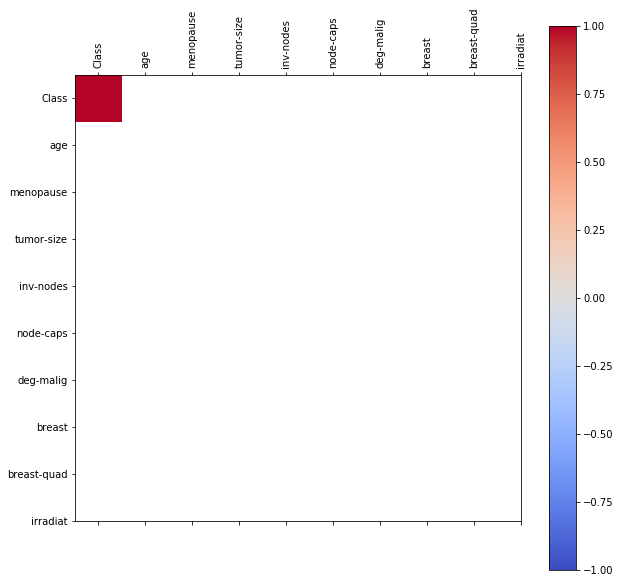

In [36]:
from scipy import stats

corr = df_breast_cancer.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_breast_cancer.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_breast_cancer.columns)
ax.set_yticklabels(df_breast_cancer.columns)
plt.show()